In [52]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [53]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
X_train = data.train.images
y_train = data.train.labels
data.train.cls = np.array([label.argmax() for label in data.train.labels])
y_train_class = np.array([label.argmax() for label in y_train])

In [92]:
X_test = data.test.images
y_test = data.test.labels
data.test.cls = np.array([label.argmax() for label in data.test.labels])
y_test_class = np.array([label.argmax() for label in y_test])

In [57]:
X_shape = (28,28)
X_shape_flat = 28 * 28
n_classes = 10

In [58]:
X_test[0].shape

(784,)

In [59]:
y_test[0].shape

(10,)

In [60]:
X_test.shape

(10000, 784)

In [61]:
def plot_images(images, true_class, pred_class=None):
    assert len(images) == len(true_class) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i].reshape(X_shape), cmap='binary')
        
        # Show true and predicted classes.
        if pred_class is None:
            xlabel = 'True: {}'.format(true_class[i])
        else:
            xlabel = 'True: {}, Pred: {}'.format(true_class[i], pred_class[i])
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

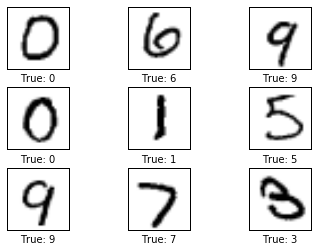

In [62]:
images = X_test[10:19]
true_class = y_test_class[10:19]
plot_images(images, true_class)

In [63]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [64]:
X_train[0:3]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [65]:
X_train[0:3,:]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [66]:
y_test_class[:3]

array([7, 2, 1])

In [67]:
y_train_class[:3]

array([7, 3, 4])

In [68]:
X = tf.placeholder(tf.float32, [None, X_shape_flat])
y = tf.placeholder(tf.float32, [None, n_classes])
y_class = tf.placeholder(tf.int64, [None])

In [69]:
W = tf.Variable(tf.zeros([X_shape_flat, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

In [70]:
logits = tf.add(tf.matmul(X,W), b)

In [71]:
y_pred = tf.nn.softmax(logits)

In [72]:
y_pred_class = tf.argmax(y_pred, 1)

In [73]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

In [74]:
cost = tf.reduce_mean(cross_entropy)

In [111]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [76]:
correct_prediction = tf.equal(y_pred_class, y_class)

In [77]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [78]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [97]:
batch_size = 100

def optimize(num_iterations):
    for i in range(num_iterations):
        batch_X, batch_y = data.train.next_batch(batch_size)
        feed_dict_train = {X: X_train, y: y_train}
        sess.run(optimizer, feed_dict=feed_dict_train)

In [80]:
feed_dict_test = {X:X_test, y:y_test, y_class:y_test_class}

In [81]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy = {:.1%}'.format(acc))

In [109]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix():
    # Get the true classification for the test-set.
    true_class = y_test_class
    # Get the predicted classification for the test-set
    pred_class = sess.run(y_pred_class, feed_dict=feed_dict_test)
    # Get the confusion matrix using sklearn
    cm = confusion_matrix(y_true=true_class, y_pred=pred_class)
    # Print the confusion matrix
    print(cm)
    
    # Plot the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #Make various adjustments to the plot
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [94]:
def plot_example_errors():
    correct, pred_class = sess.run([correct_prediction, y_pred_class],feed_dict=feed_dict_test)
    # Negate the boolean array `correct`
    incorrect = (correct == False)
    # Get the images from d testset that's incorrectly classified
    images = data.test.images[incorrect]
    # Get the predicted classes for those images
    pred_class = pred_class[incorrect]
    # Get the true classes for those images
    true_class = data.test.cls[incorrect]
    # Plot first 9 images
    plot_images(images[0:9], true_class=true_class[0:9], pred_class=pred_class[0:9])

In [84]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = sess.run(W)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(X_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [85]:
print_accuracy()

Accuracy = 9.8%


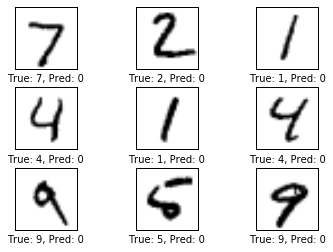

In [95]:
plot_example_errors()

In [112]:
optimize(1)

In [113]:
print_accuracy()

Accuracy = 92.2%


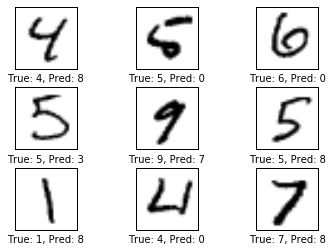

In [100]:
plot_example_errors()

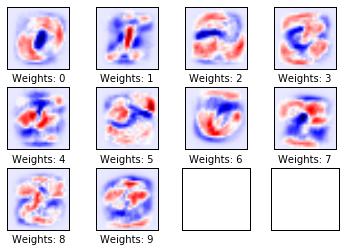

In [117]:
plot_weights()

In [114]:
optimize(9)

In [115]:
print_accuracy()

Accuracy = 92.2%


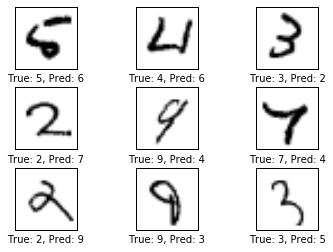

In [116]:
plot_example_errors()

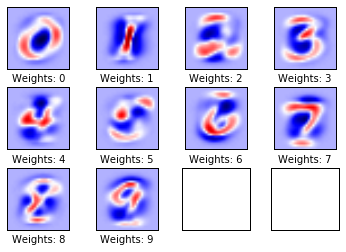

In [105]:
plot_weights()

In [106]:
optimize(990)

Accuracy = 92.2%


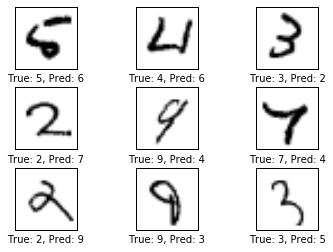

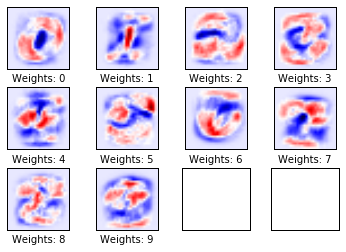

In [107]:
print_accuracy()
plot_example_errors()
plot_weights()

[[ 960    0    3    2    0    4    8    1    2    0]
 [   0 1108    2    2    0    2    4    2   15    0]
 [   7    7  920   16   11    3   14   12   36    6]
 [   3    1   24  916    0   26    2   11   19    8]
 [   1    2    3    1  917    0   13    2    8   35]
 [  10    3    3   35    9  770   17    6   32    7]
 [  10    3    3    2   10   15  912    1    2    0]
 [   3    8   22    9    6    1    0  942    2   35]
 [   7    6    7   25    9   25   11   11  867    6]
 [  11    7    2   11   36    7    0   24    7  904]]


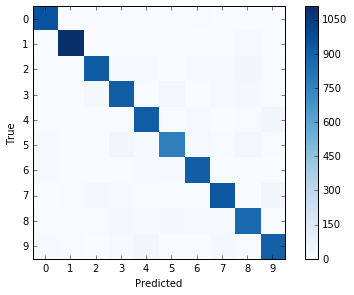

In [110]:
print_confusion_matrix()